In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import time

plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['font.size'] = 12

Część 1

In [54]:
wine = load_wine()
X = wine.data
y = wine.target
nazwy_cech = wine.feature_names
nazwy_klas = wine.target_names

print(f"\nNazwy cech:")
for i, nazwa in enumerate(nazwy_cech, 1):
    print(f"  {i:2}. {nazwa}")
print(f"\nKlasy: {list(nazwy_klas)}")
print(f"Rozkład klas: {np.bincount(y)}")


Nazwy cech:
   1. alcohol
   2. malic_acid
   3. ash
   4. alcalinity_of_ash
   5. magnesium
   6. total_phenols
   7. flavanoids
   8. nonflavanoid_phenols
   9. proanthocyanins
  10. color_intensity
  11. hue
  12. od280/od315_of_diluted_wines
  13. proline

Klasy: [np.str_('class_0'), np.str_('class_1'), np.str_('class_2')]
Rozkład klas: [59 71 48]


In [22]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

print("STANDARYZACJA (mean=0, std=1)")
print("\nDlaczego standaryzacja jest konieczna przed PCA?")
print("- PCA jest wrażliwe na skalę zmiennych")
print("- Zmienne o większej wariancji dominują w analizie")
print("- Standaryzacja wyrównuje wpływ cech o różnych skalach")
print(f"\nPrzed standaryzacją - średnie: {X.mean(axis=0).round(2)[:5]}... (pierwsze 5)")
print(f"Po standaryzacji - średnie:    {X_std.mean(axis=0).round(2)[:5]}... (pierwsze 5)")

STANDARYZACJA (mean=0, std=1)

Dlaczego standaryzacja jest konieczna przed PCA?
- PCA jest wrażliwe na skalę zmiennych
- Zmienne o większej wariancji dominują w analizie
- Standaryzacja wyrównuje wpływ cech o różnych skalach

Przed standaryzacją - średnie: [13.    2.34  2.37 19.49 99.74]... (pierwsze 5)
Po standaryzacji - średnie:    [ 0.  0. -0. -0. -0.]... (pierwsze 5)


Część 2

In [26]:
pca = PCA()
X_pca = pca.fit_transform(X_std)

print("WYNIKI PCA:")

print("\nWartości własne (eigenvalues):")
for i, ev in enumerate(pca.explained_variance_):
    print(f"  PC{i+1:2}: {ev:.4f}")

print("\nWyjaśniona wariancja (%):")
for i, var in enumerate(pca.explained_variance_ratio_):
    print(f"  PC{i+1:2}: {var*100:6.2f}%")

print(f"\nSkumulowana wariancja:")
cumsum = np.cumsum(pca.explained_variance_ratio_)
for i, cs in enumerate(cumsum):
    marker = " ← 80%" if i == 0 or (cumsum[i-1] < 0.8 <= cs) else ""
    print(f"  PC1-PC{i+1:2}: {cs*100:6.2f}%{marker}")

n_components_80 = np.argmax(cumsum >= 0.80) + 1
print(f"\n→ Wniosek: Potrzeba {n_components_80} składowych dla ≥80% wariancji")

WYNIKI PCA:

Wartości własne (eigenvalues):
  PC 1: 4.7324
  PC 2: 2.5111
  PC 3: 1.4542
  PC 4: 0.9242
  PC 5: 0.8580
  PC 6: 0.6453
  PC 7: 0.5541
  PC 8: 0.3505
  PC 9: 0.2905
  PC10: 0.2523
  PC11: 0.2271
  PC12: 0.1697
  PC13: 0.1040

Wyjaśniona wariancja (%):
  PC 1:  36.20%
  PC 2:  19.21%
  PC 3:  11.12%
  PC 4:   7.07%
  PC 5:   6.56%
  PC 6:   4.94%
  PC 7:   4.24%
  PC 8:   2.68%
  PC 9:   2.22%
  PC10:   1.93%
  PC11:   1.74%
  PC12:   1.30%
  PC13:   0.80%

Skumulowana wariancja:
  PC1-PC 1:  36.20% ← 80%
  PC1-PC 2:  55.41%
  PC1-PC 3:  66.53%
  PC1-PC 4:  73.60%
  PC1-PC 5:  80.16% ← 80%
  PC1-PC 6:  85.10%
  PC1-PC 7:  89.34%
  PC1-PC 8:  92.02%
  PC1-PC 9:  94.24%
  PC1-PC10:  96.17%
  PC1-PC11:  97.91%
  PC1-PC12:  99.20%
  PC1-PC13: 100.00%

→ Wniosek: Potrzeba 5 składowych dla ≥80% wariancji


Część 3

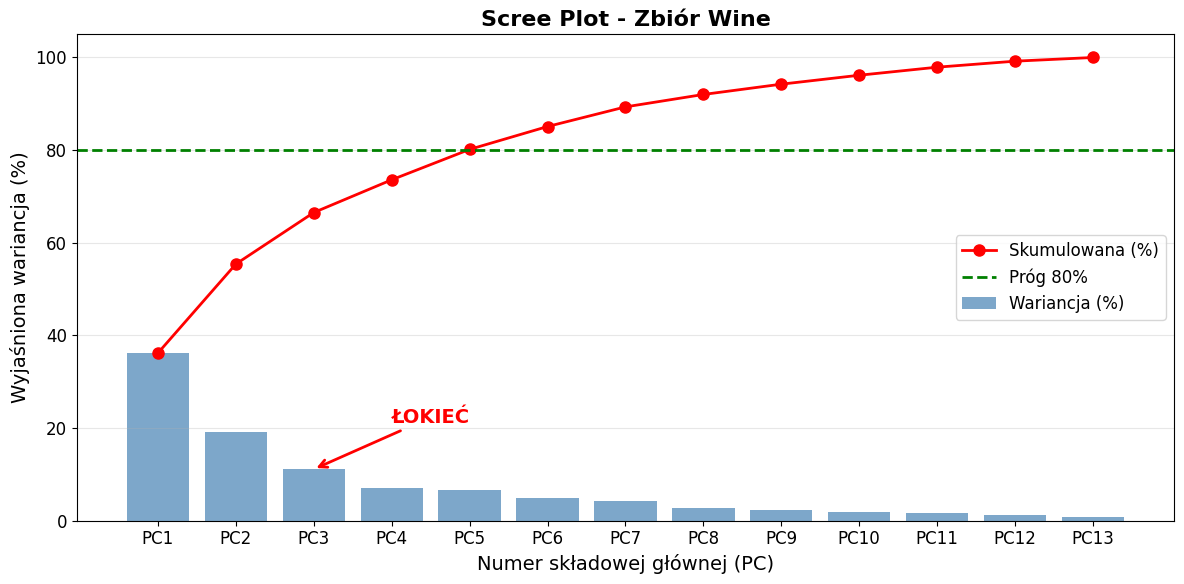

In [29]:
fig, ax = plt.subplots(figsize=(12, 6))

x_vals = np.arange(1, len(pca.explained_variance_ratio_) + 1)
wariancja = pca.explained_variance_ratio_ * 100
skumulowana = cumsum * 100

bars = ax.bar(x_vals, wariancja, alpha=0.7, color='steelblue', label='Wariancja (%)')

ax.plot(x_vals, skumulowana, 'ro-', linewidth=2, markersize=8, label='Skumulowana (%)')

ax.axhline(y=80, color='green', linestyle='--', linewidth=2, label='Próg 80%')

lokiec_idx = 2
ax.annotate('ŁOKIEĆ', xy=(lokiec_idx + 1, wariancja[lokiec_idx]),
            xytext=(lokiec_idx + 2, wariancja[lokiec_idx] + 10),
            fontsize=14, fontweight='bold', color='red',
            arrowprops=dict(arrowstyle='->', color='red', lw=2))

ax.set_xlabel('Numer składowej głównej (PC)', fontsize=14)
ax.set_ylabel('Wyjaśniona wariancja (%)', fontsize=14)
ax.set_title('Scree Plot - Zbiór Wine', fontsize=16, fontweight='bold')
ax.set_xticks(x_vals)
ax.set_xticklabels([f'PC{i}' for i in x_vals])
ax.legend(loc='center right', fontsize=12)
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

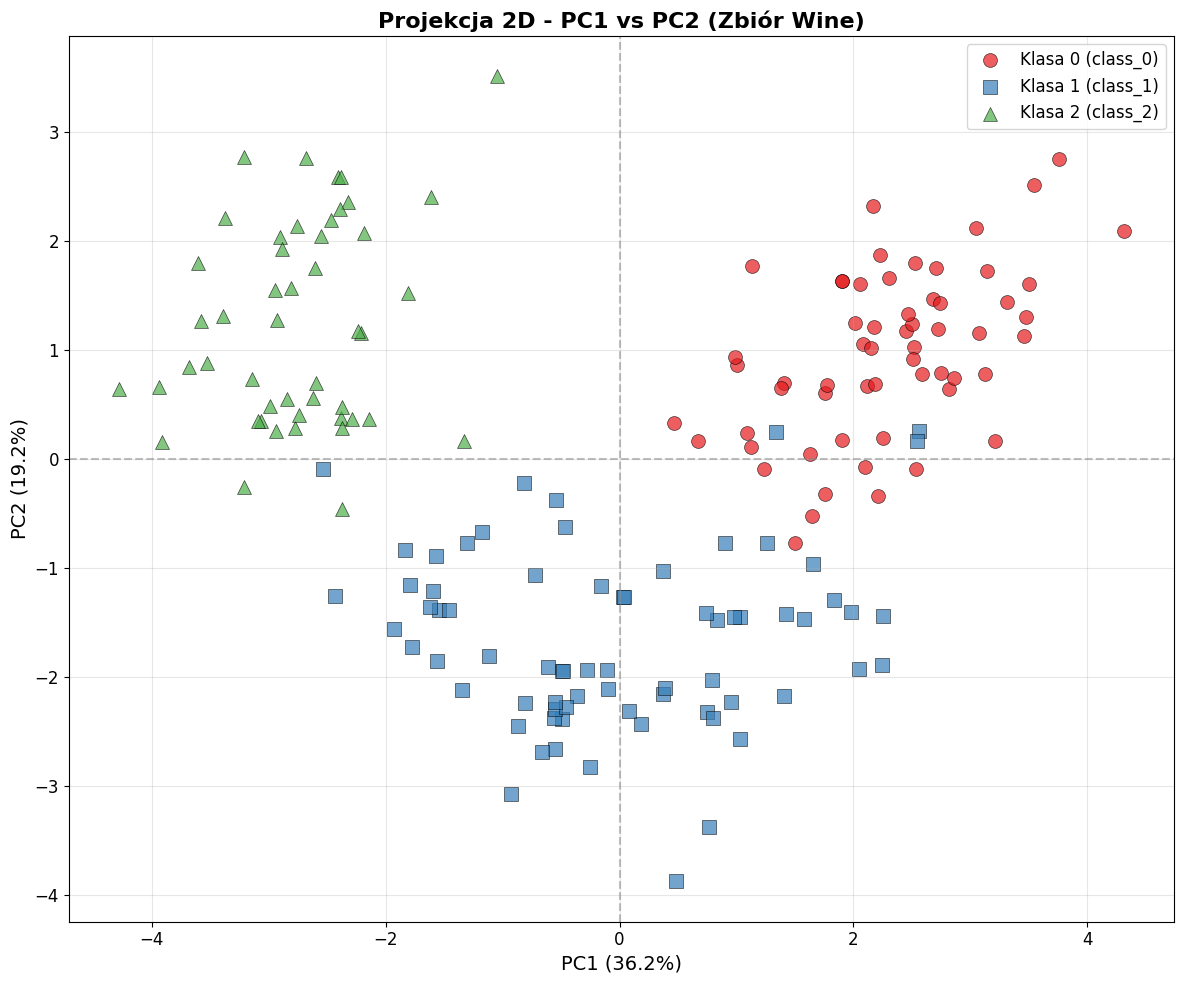

In [28]:
fig, ax = plt.subplots(figsize=(12, 10))

kolory = ['#e41a1c', '#377eb8', '#4daf4a']
markery = ['o', 's', '^']

for klasa in np.unique(y):
    mask = y == klasa
    ax.scatter(X_pca[mask, 0], X_pca[mask, 1],
               c=kolory[klasa], marker=markery[klasa],
               s=100, alpha=0.7, edgecolors='black', linewidths=0.5,
               label=f'Klasa {klasa} ({nazwy_klas[klasa]})')

ax.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)', fontsize=14)
ax.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)', fontsize=14)
ax.set_title('Projekcja 2D - PC1 vs PC2 (Zbiór Wine)', fontsize=16, fontweight='bold')
ax.legend(fontsize=12)
ax.axhline(y=0, color='gray', linestyle='--', alpha=0.5)
ax.axvline(x=0, color='gray', linestyle='--', alpha=0.5)
ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()

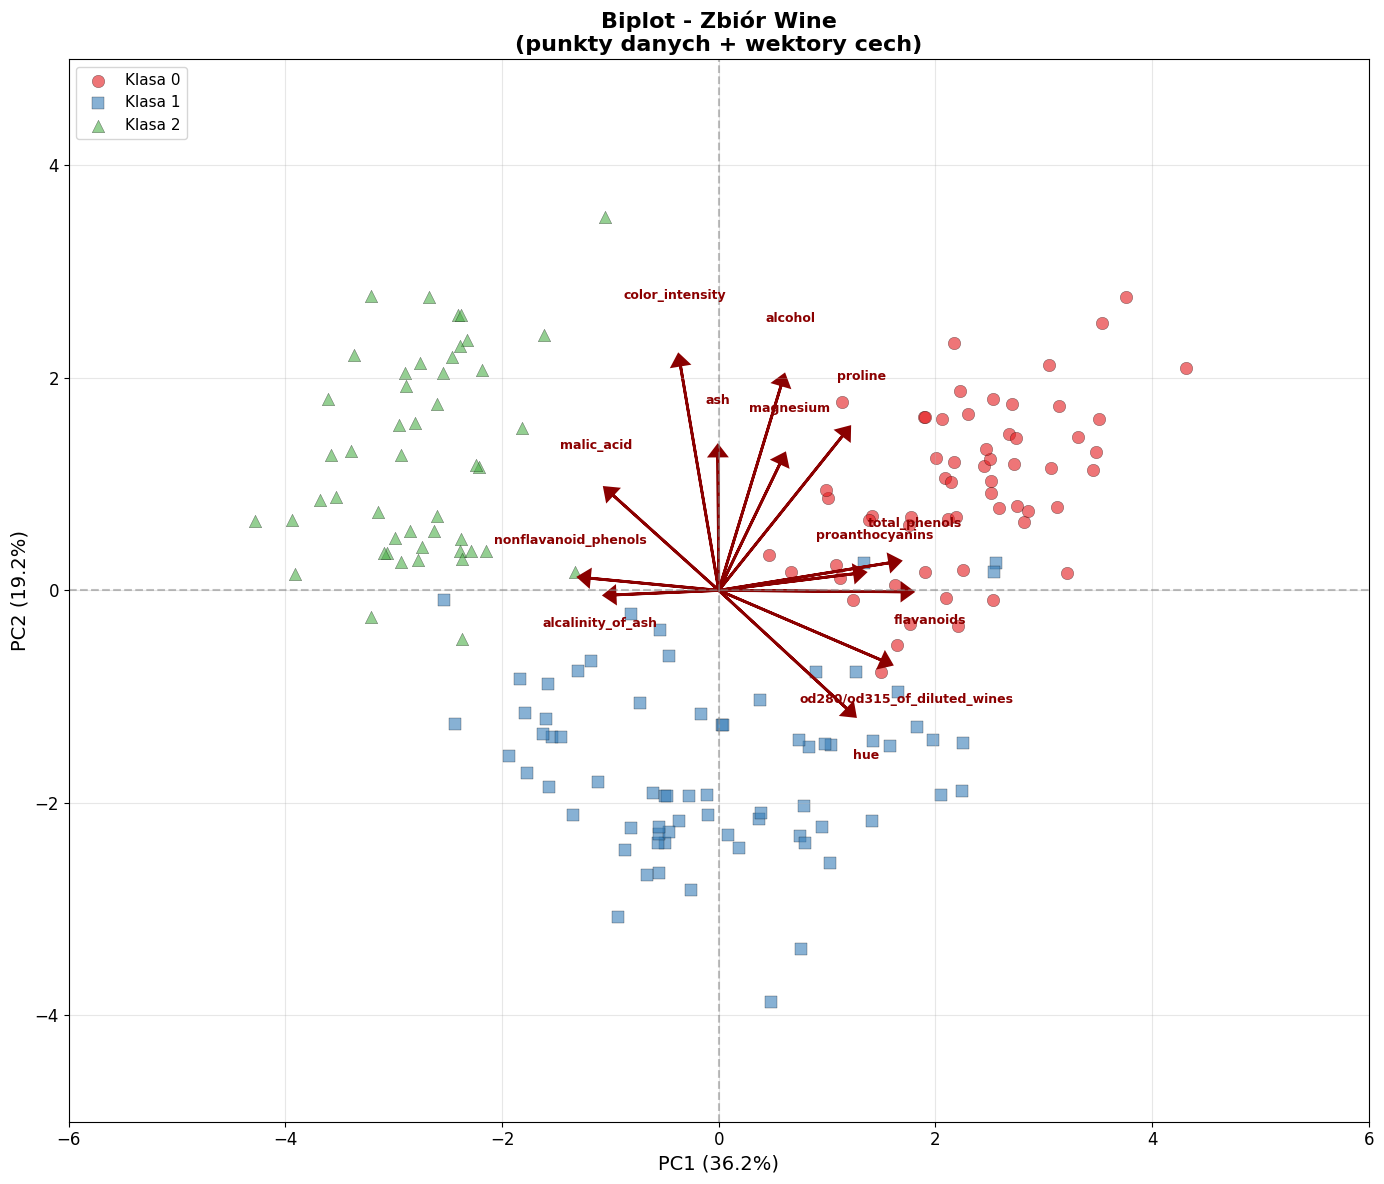

In [30]:
fig, ax = plt.subplots(figsize=(14, 12))

for klasa in np.unique(y):
    mask = y == klasa
    ax.scatter(X_pca[mask, 0], X_pca[mask, 1],
               c=kolory[klasa], marker=markery[klasa],
               s=80, alpha=0.6, edgecolors='black', linewidths=0.3,
               label=f'Klasa {klasa}')

loadings = pca.components_.T[:, :2]
skala = 4

for i, nazwa in enumerate(nazwy_cech):
    ax.arrow(0, 0, loadings[i, 0] * skala, loadings[i, 1] * skala,
             head_width=0.15, head_length=0.1, fc='darkred', ec='darkred', linewidth=2)
    offset = 0.3 if loadings[i, 1] >= 0 else -0.3
    ax.text(loadings[i, 0] * skala * 1.15, loadings[i, 1] * skala * 1.15 + offset,
            nazwa, fontsize=9, ha='center', color='darkred', fontweight='bold')

ax.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)', fontsize=14)
ax.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)', fontsize=14)
ax.set_title('Biplot - Zbiór Wine\n(punkty danych + wektory cech)', fontsize=16, fontweight='bold')
ax.legend(loc='upper left', fontsize=11)
ax.axhline(y=0, color='gray', linestyle='--', alpha=0.5)
ax.axvline(x=0, color='gray', linestyle='--', alpha=0.5)
ax.grid(alpha=0.3)
ax.set_xlim(-6, 6)
ax.set_ylim(-5, 5)

plt.tight_layout()
plt.show()

Część 4

In [60]:
print("ŁADUNKI SKŁADOWYCH (LOADING)")
print(f"{'Nr':<4} {'Cecha':<25} {'PC1':>10} {'PC2':>10}")

for i, nazwa in enumerate(nazwy_cech):
    pc1_loading = pca.components_[0, i]
    pc2_loading = pca.components_[1, i]
    print(f"{i+1:<4} {nazwa:<25} {pc1_loading:>10.4f} {pc2_loading:>10.4f}")

print("\nDOMINUJĄCE CECHY:")

# PC1
pc1_sorted_idx = np.argsort(np.abs(pca.components_[0]))[::-1]
print("\nPC1 - TOP 5 cech:")
for i, idx in enumerate(pc1_sorted_idx[:5], 1):
    print(f"  {i}. {nazwy_cech[idx]}: {pca.components_[0, idx]:.4f}")

# PC2
pc2_sorted_idx = np.argsort(np.abs(pca.components_[1]))[::-1]
print("\nPC2 - TOP 5 cech:")
for i, idx in enumerate(pc2_sorted_idx[:5], 1):
    print(f"  {i}. {nazwy_cech[idx]}: {pca.components_[1, idx]:.4f}")

ŁADUNKI SKŁADOWYCH (LOADING)
Nr   Cecha                            PC1        PC2
1    alcohol                       0.1443     0.4837
2    malic_acid                   -0.2452     0.2249
3    ash                          -0.0021     0.3161
4    alcalinity_of_ash            -0.2393    -0.0106
5    magnesium                     0.1420     0.2996
6    total_phenols                 0.3947     0.0650
7    flavanoids                    0.4229    -0.0034
8    nonflavanoid_phenols         -0.2985     0.0288
9    proanthocyanins               0.3134     0.0393
10   color_intensity              -0.0886     0.5300
11   hue                           0.2967    -0.2792
12   od280/od315_of_diluted_wines     0.3762    -0.1645
13   proline                       0.2868     0.3649

DOMINUJĄCE CECHY:

PC1 - TOP 5 cech:
  1. flavanoids: 0.4229
  2. total_phenols: 0.3947
  3. od280/od315_of_diluted_wines: 0.3762
  4. proanthocyanins: 0.3134
  5. nonflavanoid_phenols: -0.2985

PC2 - TOP 5 cech:
  1. color_i

In [35]:
print("PYTANIE 1: Które cechy dominują w PC1? Co reprezentuje ta składowa?")
print("""
W PC1 dominują cechy związane ze związkami flavanoidalnymi:
  - Flavanoids: 0.4226
  - Total phenols: 0.3945
  - OD280/OD315 : 0.3762
  - Proanthocyanins: 0.3131

PC1 reprezentuje głównie "jakość flavanoidów" wina:
  - Wysokie wartości PC1 = wina bogate w związki fenolowe
  - Niskie wartości PC1 = wina uboższe w fenole
  - Składowa ta wyjaśnia największą część wariancji danych
""")


print("PYTANIE 2: Które cechy dominują w PC2?")
print("""
W PC2 dominują cechy związane z kolorem i kwasowością:
  - Color intensity: 0.5259
  - Alcalinity of ash: 0.5175
  - Hue: -0.4536
  - Malic acid: 0.2448

→ PC2 reprezentuje kontrast między "ciemnością" a "jasnością" wina:
  - Wysokie wartości PC2 = wina ciemniejsze
  - Niskie wartości PC2 = wina jaśniejsze
""")

print("PYTANIE 3: Czy klasy są dobrze separowalne w 2D?")
print("""
 TAK:
  - Klasa 0: wyraźnie oddzielona, skupiona w prawej części wykresu
  - Klasa 1: zajmuje środkową część wykresu,częściowo nakłada się z klasą 2
  - Klasa 2: skupiona w lewej części wykresu
""")

PYTANIE 1: Które cechy dominują w PC1? Co reprezentuje ta składowa?

W PC1 dominują cechy związane ze związkami flavanoidalnymi:
  - Flavanoids: 0.4226
  - Total phenols: 0.3945
  - OD280/OD315 : 0.3762
  - Proanthocyanins: 0.3131
  
PC1 reprezentuje głównie "jakość flavanoidów" wina:
  - Wysokie wartości PC1 = wina bogate w związki fenolowe
  - Niskie wartości PC1 = wina uboższe w fenole
  - Składowa ta wyjaśnia największą część wariancji danych

PYTANIE 2: Które cechy dominują w PC2?

W PC2 dominują cechy związane z kolorem i kwasowością:
  - Color intensity: 0.5259
  - Alcalinity of ash: 0.5175  
  - Hue: -0.4536 
  - Malic acid: 0.2448
  
→ PC2 reprezentuje kontrast między "ciemnością" a "jasnością" wina:
  - Wysokie wartości PC2 = wina ciemniejsze
  - Niskie wartości PC2 = wina jaśniejsze

PYTANIE 3: Czy klasy są dobrze separowalne w 2D?

 TAK:
  - Klasa 0: wyraźnie oddzielona, skupiona w prawej części wykresu
  - Klasa 1: zajmuje środkową część wykresu,częściowo nakłada się z kla

Zadanie 4

In [36]:
pca_bez_std = PCA()
X_pca_bez_std = pca_bez_std.fit_transform(X)

print("\nWyjaśniona wariancja (%) - BEZ standaryzacji:")
for i, var in enumerate(pca_bez_std.explained_variance_ratio_[:5]):
    print(f"  PC{i+1}: {var*100:6.2f}%")
print(f"  ... (pozostałe składowe)")

cumsum_bez_std = np.cumsum(pca_bez_std.explained_variance_ratio_)
print(f"\nSkumulowana wariancja PC1-PC2: {cumsum_bez_std[1]*100:.2f}%")


Wyjaśniona wariancja (%) - BEZ standaryzacji:
  PC1:  99.81%
  PC2:   0.17%
  PC3:   0.01%
  PC4:   0.01%
  PC5:   0.00%
  ... (pozostałe składowe)

Skumulowana wariancja PC1-PC2: 99.98%


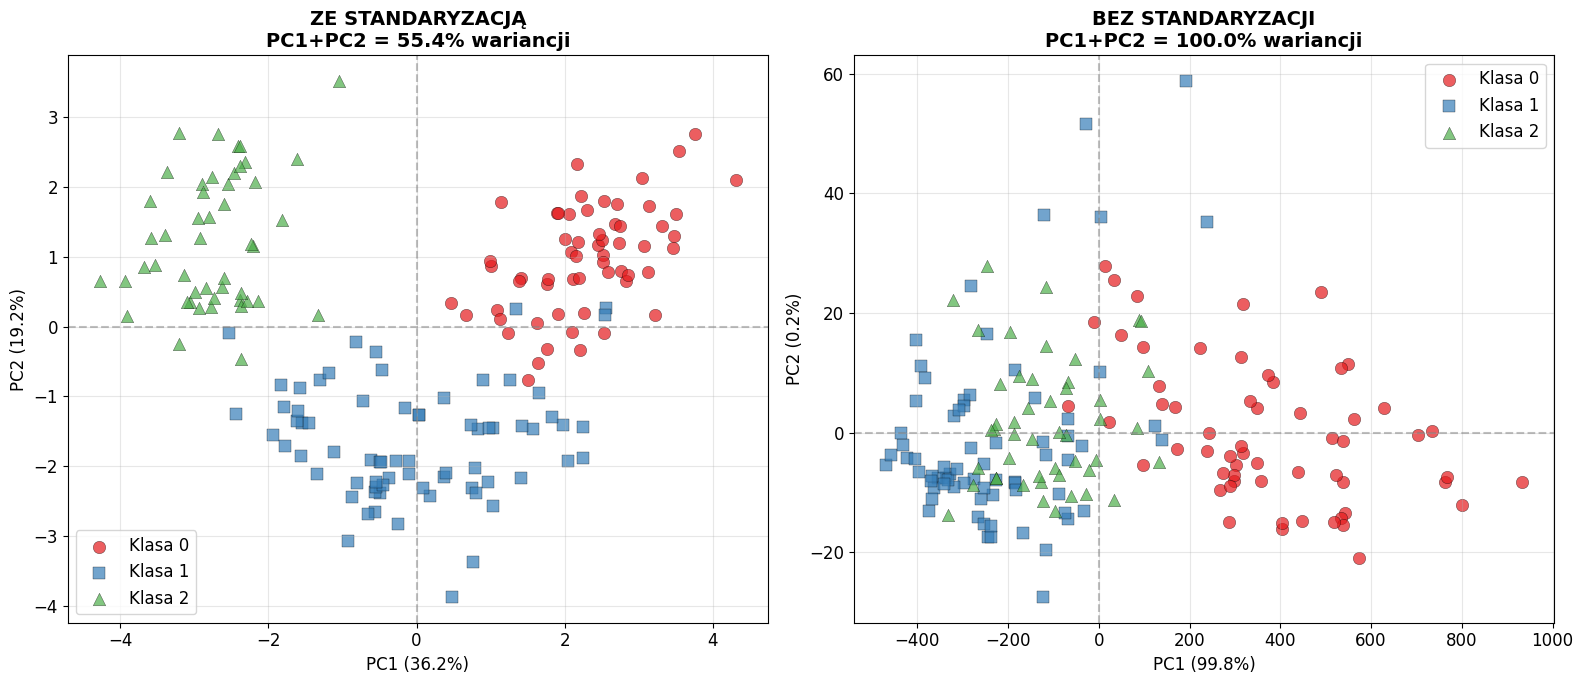

In [38]:
fig, axes = plt.subplots(1, 2, figsize=(16, 7))

ax1 = axes[0]
for klasa in np.unique(y):
    mask = y == klasa
    ax1.scatter(X_pca[mask, 0], X_pca[mask, 1],
                c=kolory[klasa], marker=markery[klasa],
                s=80, alpha=0.7, edgecolors='black', linewidths=0.3,
                label=f'Klasa {klasa}')
ax1.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)', fontsize=12)
ax1.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)', fontsize=12)
ax1.set_title(f'ZE STANDARYZACJĄ\nPC1+PC2 = {cumsum[1]*100:.1f}% wariancji',
              fontsize=14, fontweight='bold')
ax1.legend()
ax1.grid(alpha=0.3)
ax1.axhline(y=0, color='gray', linestyle='--', alpha=0.5)
ax1.axvline(x=0, color='gray', linestyle='--', alpha=0.5)

ax2 = axes[1]
for klasa in np.unique(y):
    mask = y == klasa
    ax2.scatter(X_pca_bez_std[mask, 0], X_pca_bez_std[mask, 1],
                c=kolory[klasa], marker=markery[klasa],
                s=80, alpha=0.7, edgecolors='black', linewidths=0.3,
                label=f'Klasa {klasa}')
ax2.set_xlabel(f'PC1 ({pca_bez_std.explained_variance_ratio_[0]*100:.1f}%)', fontsize=12)
ax2.set_ylabel(f'PC2 ({pca_bez_std.explained_variance_ratio_[1]*100:.1f}%)', fontsize=12)
ax2.set_title(f'BEZ STANDARYZACJI\nPC1+PC2 = {cumsum_bez_std[1]*100:.1f}% wariancji',
              fontsize=14, fontweight='bold')
ax2.legend()
ax2.grid(alpha=0.3)
ax2.axhline(y=0, color='gray', linestyle='--', alpha=0.5)
ax2.axvline(x=0, color='gray', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

In [69]:
print("\nWariancje oryginalnych cech (bez standaryzacji):")
wariancje = X.var(axis=0)
sorted_idx = np.argsort(wariancje)[::-1]

for i, idx in enumerate(sorted_idx):
    print(f"  {i+1:2}. {nazwy_cech[idx]:<25}: {wariancje[idx]:>12.2f}")

dominujaca_cecha = nazwy_cech[sorted_idx[0]]
dominujaca_wariancja = wariancje[sorted_idx[0]]

print(f"""
 Bez standaryzacji cecha '{dominujaca_cecha}' zdominowała analizę

  • Wariancja proliny: {dominujaca_wariancja:.2f}
  • Wariancja drugiej cechy: {wariancje[sorted_idx[1]]:.2f}
  • Stosunek: {dominujaca_wariancja / wariancje[sorted_idx[1]]:.1f}x większa

Prolina ma wartości ~500-1700, podczas gdy większość cech ma wartości 0-15. Ta różnica w skalach powoduje, że PCA bez
standaryzacji praktycznie analizuje tylko prolinę.
""")


print(f"{'Metryka':<34} {'Ze std':>12} {'Bez std':>12}")
print(f"{'Wariancja PC1 (%)':<35} {pca.explained_variance_ratio_[0]*100:>12.2f} {pca_bez_std.explained_variance_ratio_[0]*100:>12.2f}")
print(f"{'Wariancja PC2 (%)':<35} {pca.explained_variance_ratio_[1]*100:>12.2f} {pca_bez_std.explained_variance_ratio_[1]*100:>12.2f}")
print(f"{'Skumulowana PC1+PC2 (%)':<35} {cumsum[1]*100:>12.2f} {cumsum_bez_std[1]*100:>12.2f}")


Wariancje oryginalnych cech (bez standaryzacji):
   1. proline                  :     98609.60
   2. magnesium                :       202.84
   3. alcalinity_of_ash        :        11.09
   4. color_intensity          :         5.34
   5. malic_acid               :         1.24
   6. flavanoids               :         0.99
   7. alcohol                  :         0.66
   8. od280/od315_of_diluted_wines:         0.50
   9. total_phenols            :         0.39
  10. proanthocyanins          :         0.33
  11. ash                      :         0.07
  12. hue                      :         0.05
  13. nonflavanoid_phenols     :         0.02

 Bez standaryzacji cecha 'proline' zdominowała analizę
  
  • Wariancja proliny: 98609.60
  • Wariancja drugiej cechy: 202.84
  • Stosunek: 486.1x większa
  
Prolina ma wartości ~500-1700, podczas gdy większość cech ma wartości 0-15. Ta różnica w skalach powoduje, że PCA bez 
standaryzacji praktycznie analizuje tylko prolinę.

Metryka            

Zadanie 5

In [42]:
X_train, X_test, y_train, y_test = train_test_split(
    X_std, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nPodział danych:")
print(f"  Zbiór treningowy: {X_train.shape[0]} próbek ({X_train.shape[0]/len(X)*100:.0f}%)")
print(f"  Zbiór testowy:    {X_test.shape[0]} próbek ({X_test.shape[0]/len(X)*100:.0f}%)")


Podział danych:
  Zbiór treningowy: 142 próbek (80%)
  Zbiór testowy:    36 próbek (20%)


In [45]:
pca_2 = PCA(n_components=2)
pca_5 = PCA(n_components=5)

X_train_pca2 = pca_2.fit_transform(X_train)
X_test_pca2 = pca_2.transform(X_test)

X_train_pca5 = pca_5.fit_transform(X_train)
X_test_pca5 = pca_5.transform(X_test)

warianty = {
    'Oryginalne (13 cech)': (X_train, X_test),
    'PCA (2 składowe)': (X_train_pca2, X_test_pca2),
    'PCA (5 składowych)': (X_train_pca5, X_test_pca5)
}

wyniki = {}

print(f"{'Wariant danych':<25} {'Wymiary':>10} {'Accuracy':>12} {'Czas (ms)':>12}")

for nazwa, (X_tr, X_te) in warianty.items():
    knn = KNeighborsClassifier(n_neighbors=5)

    start = time.time()
    knn.fit(X_tr, y_train)
    czas_treningu = (time.time() - start) * 1000
    y_pred = knn.predict(X_te)
    accuracy = accuracy_score(y_test, y_pred)

    wyniki[nazwa] = {'wymiary': X_tr.shape[1], 'accuracy': accuracy, 'czas': czas_treningu}

    print(f"{nazwa:<25} {X_tr.shape[1]:>10} {accuracy*100:>11.2f}% {czas_treningu:>11.4f}")

Wariant danych               Wymiary     Accuracy    Czas (ms)
Oryginalne (13 cech)              13       97.22%      1.3642
PCA (2 składowe)                   2       91.67%      1.1282
PCA (5 składowych)                 5      100.00%      0.9000


In [52]:
print(f"""
1. Oryginalne dane (13 cech):
   • Accuracy: {wyniki['Oryginalne (13 cech)']['accuracy']*100:.2f}%
   • Czas treningu: {wyniki['Oryginalne (13 cech)']['czas']:.4f} ms

2. PCA (2 składowe):
   • Accuracy: {wyniki['PCA (2 składowe)']['accuracy']*100:.2f}%
   • Czas treningu: {wyniki['PCA (2 składowe)']['czas']:.4f} ms
   • Redukcja wymiarów: 13 → 2 ({100 - 2/13*100:.0f}% mniej cech)

3. PCA (5 składowych):
   • Accuracy: {wyniki['PCA (5 składowych)']['accuracy']*100:.2f}%
   • Czas treningu: {wyniki['PCA (5 składowych)']['czas']:.4f} ms
   • Redukcja wymiarów: 13 → 5 ({100 - 5/13*100:.0f}% mniej cech)
""")


1. Oryginalne dane:
   • Accuracy: 97.22%
   • Czas treningu: 1.3642 ms

2. PCA (2 składowe):
   • Accuracy: 91.67%
   • Czas treningu: 1.1282 ms
   • Redukcja wymiarów: 13 → 2 (85% mniej cech)

3. PCA (5 składowych):
   • Accuracy: 100.00%
   • Czas treningu: 0.9000 ms
   • Redukcja wymiarów: 13 → 5 (62% mniej cech)

